In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Sigmoid Function

In [2]:
def sigmoid(z):
  """
  Sigmoid Function: σ(z) = 1 / (1 + e^(-z))
  Maps any real value to the (0,1) range
  """

  return 1 / (1 + np.exp(-z))

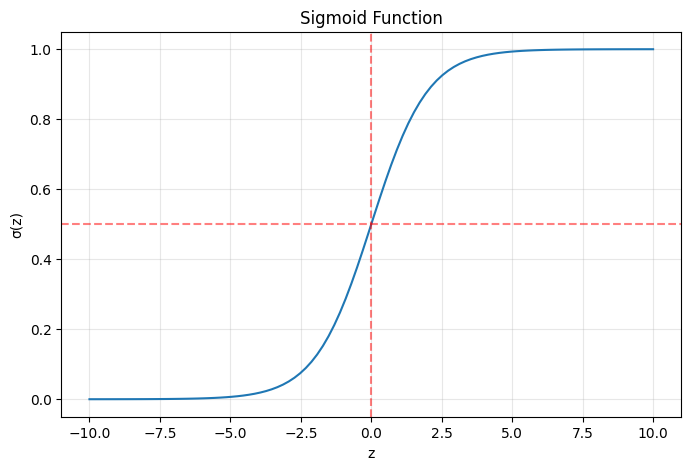

In [9]:
# Visualization
z = np.linspace(-10,10,100) # 100 evenly spaced points between -10 and 10
plt.figure(figsize=(8,5))
plt.plot(z,sigmoid(z))
plt.grid(True, alpha=0.3) # alpha is the transparency
plt.xlabel("z")
plt.ylabel("σ(z)")
plt.title("Sigmoid Function")
plt.axhline(y=0.5, color='r', linestyle='--', alpha=0.5) # Adding horizontal line
plt.axvline(x=0, color='r', linestyle='--', alpha=0.5) # Adding vertical line
plt.show()

### Testing the property: 1 - σ(x) = σ(-x)

In [19]:
x = 3.14168
print(f"1 - σ({x}) = {1 - sigmoid(x):.6f}")
print(f"σ(-{x}) = {sigmoid(-x):.6f}")
print(f"Property holds: {np.isclose(1 - sigmoid(x), sigmoid(-x))}")  # Check if values are approximately equal

1 - σ(3.14168) = 0.041420
σ(-3.14168) = 0.041420
Property holds: True


##Sentiment Classification Example

In [50]:
class LogisticRegression:
  def __init__(self, n_features):
    """ Initializing weights and bias to zero""" ### In LogReg we initialize to 0 usually, but in deep learning to randomly close to 0 values breaking simmetry (if all weights started at zero, neurons would learn the same features)
    self.w = np.zeros(n_features)
    self.b = 0

  def predict_proba(self,x):
    """
    Compute P(y=1|x) with logistic regression
    x: feature vector
    """

    z = np.dot(self.w, x) + self.b # Linear combination: wx + b
    return(sigmoid(z))

  def predict(self,x):
    """Make binary the prediction using a .5 threshold"""
    return 1 if self.predict_proba(x) > 0.5 else 0

  def __call__(self):
    return("Logistic Regression Model with Weights: ", self.w, "Intercept:", self.b)

In [51]:
# Example from the book (sentiment analysis features)
features = {
    'positive_words': 3,      # Count of positive sentiment words
    'negative_words': 2,      # Count of negative sentiment words
    'has_no': 1,             # Binary: contains word "no"
    'pronouns': 3,           # Count of 1st/2nd person pronouns
    'has_exclamation': 0,    # Binary: contains "!"
    'log_word_count': 4.19   # Log of document length
}

# Converting dic to numpy array (order matters)
x = np.array([features['positive_words'],
              features['negative_words'],
              features['has_no'],
              features['pronouns'],
              features['has_exclamation'],
              features['log_word_count']
])

# Creating model with weights from the book
model = LogisticRegression(n_features=6)
model.w = np.array([2.5, -5.0, -1.2, 0.5, 2.0, 0.7])  # Learned weights from the book
model.b = 0.1

print(model())

# Calculate probabilities
prob_positive = model.predict_proba(x)
prob_negative = 1 - prob_positive

print(f"Feature vector x: {x}")
print(f"Weights w: {model.w}")
print(f"Bias b: {model.b}")
print(f"z = w·x + b = {np.dot(model.w, x) + model.b:.3f}")
print(f"P(positive|x) = {prob_positive:.2f}")
print(f"P(negative|x) = {prob_negative:.2f}")
print(f"Prediction: {'positive' if model.predict(x) == 1 else 'negative'}")


('Logistic Regression Model with Weights: ', array([ 2.5, -5. , -1.2,  0.5,  2. ,  0.7]), 'Intercept:', 0.1)
Feature vector x: [3.   2.   1.   3.   0.   4.19]
Weights w: [ 2.5 -5.  -1.2  0.5  2.   0.7]
Bias b: 0.1
z = w·x + b = 0.833
P(positive|x) = 0.70
P(negative|x) = 0.30
Prediction: positive
